In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import pickle
import xarray
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
import datetime
from scipy.stats import binned_statistic
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import kuka_tools as kt
import itertools

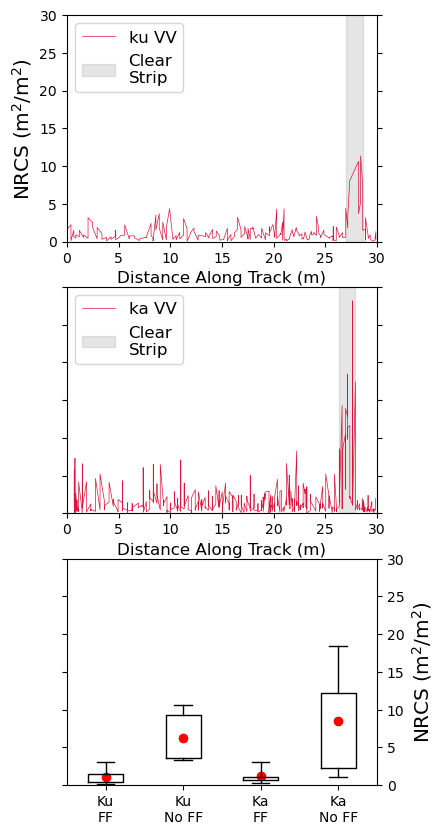

In [2]:
ff_pickles = '/home/robbie/Dropbox/kuka_bare/data/pickles/FF_fig'

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(4,10))   
                
summary_stats=[]  

for freq,ax in zip(['ku','ka'],[ax1,ax2]):
    
    (nrcs_return,
             start_along_track,
             end_along_track) = pickle.load(open(f'{ff_pickles}/{freq}30.p','rb'))   
    
    nrcs_return.sort_index(axis=0,inplace=True)
    
    ax.plot(nrcs_return['along_track'],
             nrcs_return['vv'],

             label=f'{freq} VV',
             lw=0.5,
             color='crimson')

#     ax.set_title(f'{freq}',fontsize='x-large')
    ax.set_xlabel('Distance Along Track (m)',fontsize='large')



    ax.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2,label='Clear\nStrip')
    ax.legend(fontsize='large')
    
    ax.set_ylim(0,30)
    ax.set_xlim(0,30)
    ax.set_xticks(np.arange(0,31,5))
    
    summary_stats.append(nrcs_return[nrcs_return['along_track']<25]['vv'])
    summary_stats.append(nrcs_return[(nrcs_return['along_track']>start_along_track)&(nrcs_return['along_track']<end_along_track)]['vv'])

summary_means = [np.nanmean(x) for x in summary_stats]
ax3.scatter(np.arange(1,5),summary_means,color='r')
    
ax1.set_ylabel(f'NRCS (m$^2$/m$^2$)',fontsize='x-large')
ax2.set_yticklabels([])

medianprops = dict(linestyle='-', linewidth=0., color='k')
ax3.boxplot(summary_stats,
            medianprops=medianprops,
            showmeans=False,
#             meanprops=dict(color='r',linewidth=5),
            whis=[5,95],
            showfliers=False)

ax3.set_ylim(0,30)
xlabels=['Ku\nFF','Ku\nNo FF','Ka\nFF','Ka\nNo FF']
ax3.set_xticklabels(xlabels)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel(f'NRCS (m$^2$/m$^2$)',fontsize='x-large')


for ax in [ax1,ax2,ax3]:
    ax.tick_params('y',right=True,left=True)
    
fig.subplots_adjust(wspace=0.08)

plt.show()

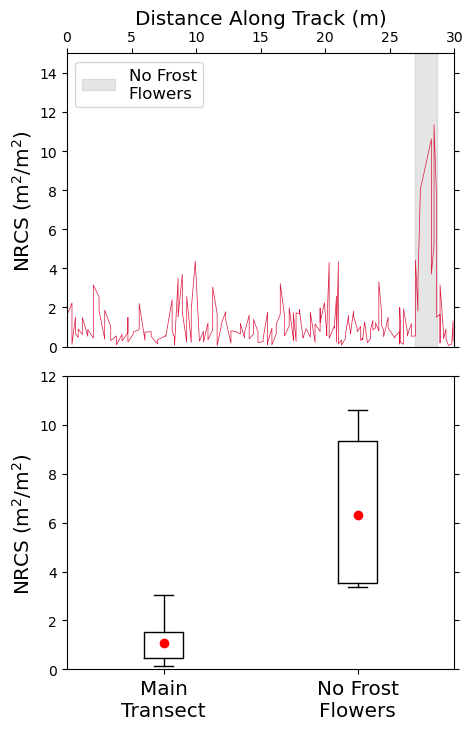

In [9]:
ff_pickles = '/home/robbie/Dropbox/kuka_bare/data/pickles/FF_fig'

fig,(ax1,ax3) = plt.subplots(2,1,figsize=(5,8))   
                
summary_stats=[]  

for freq,ax in zip(['ku'],[ax1]):
    
    (nrcs_return,
             start_along_track,
             end_along_track) = pickle.load(open(f'{ff_pickles}/{freq}30.p','rb'))   
    
    nrcs_return.sort_index(axis=0,inplace=True)
    
    ax.plot(nrcs_return['along_track'],
             nrcs_return['vv'],
             lw=0.5,
             color='crimson')


#     ax.set_title(f'{freq}',fontsize='x-large')
    ax.set_xlabel('Distance Along Track (m)',fontsize='x-large')



    ax.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2,label='No Frost\nFlowers')
    ax.legend(fontsize='large')
    
    ax.set_ylim(0,15)
    ax.set_xlim(0,30)
    ax.set_xticks(np.arange(0,31,5))
    
    summary_stats.append(nrcs_return[nrcs_return['along_track']<25]['vv'])
    summary_stats.append(nrcs_return[(nrcs_return['along_track']>start_along_track)&(nrcs_return['along_track']<end_along_track)]['vv'])

summary_means = [np.nanmean(x) for x in summary_stats]
ax3.scatter(np.arange(1,3),summary_means,color='r')
    
ax1.set_ylabel(f'NRCS (m$^2$/m$^2$)',fontsize='x-large')
ax2.set_yticklabels([])

medianprops = dict(linestyle='-', linewidth=0., color='k')
ax3.boxplot(summary_stats,
            medianprops=medianprops,
            showmeans=False,
            widths=0.2,
#             meanprops=dict(color='r',linewidth=5),
            whis=[5,95],
            showfliers=False)

ax3.set_ylim(0,12)
xlabels=['Main\nTransect','No Frost\nFlowers']
ax3.set_xticklabels(xlabels,fontsize='x-large')
# ax3.yaxis.tick_right()
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
# ax3.yaxis.set_label_position('left')
ax3.set_ylabel(f'NRCS (m$^2$/m$^2$)',fontsize='x-large')


for ax in [ax1,ax2,ax3]:
    ax.tick_params('y',right=True,left=True)
    
fig.subplots_adjust(hspace=0.1)


overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}frost_flowers.png',dpi=400,bbox_inches='tight')

plt.show()

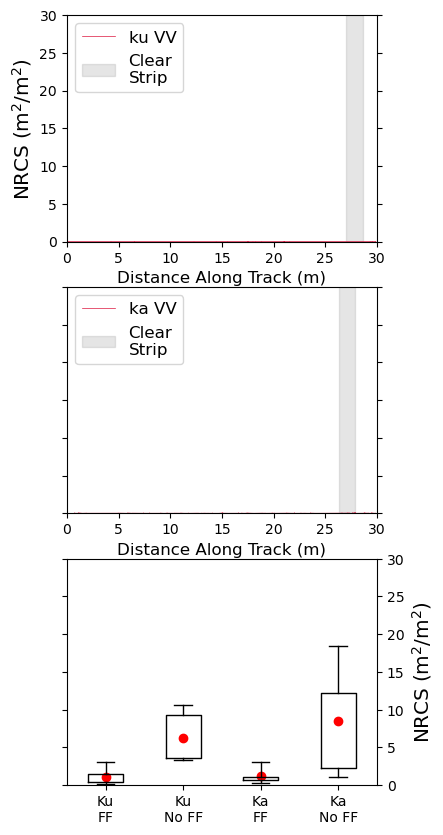

In [28]:
ff_pickles = '/home/robbie/Dropbox/kuka_bare/data/pickles/FF_fig'

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(4,10))   
                
summary_stats=[]  



for freq,ax in zip(['ku','ka'],[ax1,ax2]):
    
    (nrcs_return,
             start_along_track,
             end_along_track) = pickle.load(open(f'{ff_pickles}/{freq}30.p','rb'))   
    
    nrcs_return.sort_index(axis=0,inplace=True)
    
    ax.plot(nrcs_return['along_track'],
             nrcs_return['hv'],

             label=f'{freq} VV',
             lw=0.5,
             color='crimson')

#     ax.set_title(f'{freq}',fontsize='x-large')
    ax.set_xlabel('Distance Along Track (m)',fontsize='large')



    ax.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2,label='Clear\nStrip')
    ax.legend(fontsize='large')
    
    ax.set_ylim(0,30)
    ax.set_xlim(0,30)
    ax.set_xticks(np.arange(0,31,5))
    
    summary_stats.append(nrcs_return[nrcs_return['along_track']<25]['vv'])
    summary_stats.append(nrcs_return[(nrcs_return['along_track']>start_along_track)&(nrcs_return['along_track']<end_along_track)]['vv'])

summary_means = [np.nanmean(x) for x in summary_stats]
ax3.scatter(np.arange(1,5),summary_means,color='r')
    
ax1.set_ylabel(f'NRCS (m$^2$/m$^2$)',fontsize='x-large')
ax2.set_yticklabels([])

medianprops = dict(linestyle='-', linewidth=0., color='k')
ax3.boxplot(summary_stats,
            medianprops=medianprops,
            showmeans=False,
#             meanprops=dict(color='r',linewidth=5),
            whis=[5,95],
            showfliers=False)

ax3.set_ylim(0,30)
xlabels=['Ku\nFF','Ku\nNo FF','Ka\nFF','Ka\nNo FF']
ax3.set_xticklabels(xlabels)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel(f'NRCS (m$^2$/m$^2$)',fontsize='x-large')


for ax in [ax1,ax2,ax3]:
    ax.tick_params('y',right=True,left=True)
    
fig.subplots_adjust(wspace=0.08)

plt.show()

In [30]:
for i in summary_stats:
    
    print(np.nanmean(i))

1.067537633451836
6.302182277589599
1.186829932545692
8.546041623702033
